### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("Fraud.csv")

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Data Dictionary

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Checking Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Checking Null values

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


### Checking Duplicate values

In [8]:
df.duplicated().sum()

np.int64(0)

### Checking Shape

In [9]:
df.shape

(6362620, 11)

In [10]:
def check_fraud_merchant():
    new_df = df[df['nameDest'].str.startswith('M')]
    return [new_df['isFraud'].sum(),new_df['type'].unique(),new_df['oldbalanceDest'].sum(),new_df['newbalanceDest'].sum(),new_df.shape,new_df['isFlaggedFraud'].sum()]
check_fraud_merchant()

[np.int64(0),
 array(['PAYMENT'], dtype=object),
 np.float64(0.0),
 np.float64(0.0),
 (2151495, 11),
 np.int64(0)]

For Merchants there is no information regarding the attribute oldbalanceDest and newbalanceDest.
So we can clearly seen that all receiver Merchant Id is not fraud. So all these rows can be dropped.

In [11]:
def check_fraud_merchant():
    new_df = df[df['nameDest'].str.startswith('C')]
    return [new_df['isFraud'].sum(),new_df['type'].unique(),new_df['oldbalanceDest'].sum(),new_df['newbalanceDest'].sum(),new_df.shape,new_df['isFlaggedFraud'].sum()]
check_fraud_merchant()

[np.int64(8213),
 array(['TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], dtype=object),
 np.float64(7003346437431.256),
 np.float64(7794186583127.557),
 (4211125, 11),
 np.int64(16)]

In [12]:
df = df[df["nameDest"].str.startswith("M") == False].reset_index(drop=True)
df.shape

(4211125, 11)

In [13]:
df = df[df["nameDest"].str.startswith("M") == False].reset_index(drop=True)

In [14]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
2,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
3,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
4,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4211120,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
4211121,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
4211122,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
4211123,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [15]:
df.groupby(["type"])[["isFraud","isFlaggedFraud"]].sum()

,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
TRANSFER,4097,16


#### We don't have any Fraud transaction for DEBIT and CASH_IN type.
So these rows can be dropped.

In [16]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C411128068       1
C1620658775      1
C492082350       1
C1920187579      1
C692082136       1
Name: count, Length: 571961, dtype: int64

In [17]:
df = df[~df['type'].isin(['DEBIT','CASH_IN'])].reset_index(drop=True)
df.shape

(2770409, 11)

In [18]:
df[df["isFlaggedFraud"]==1]["isFraud"].sum()

np.int64(16)

In [19]:
df.drop(["step","isFlaggedFraud"],axis="columns",inplace=True)

In [20]:
df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
2,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0
3,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
4,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...,...
2770404,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
2770405,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
2770406,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
2770407,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1


### Checking Outliers

amount


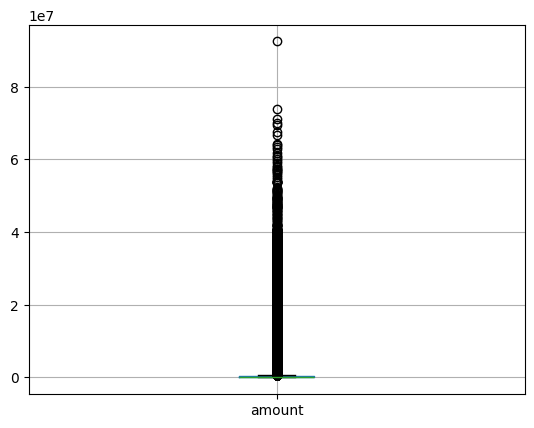

oldbalanceOrg


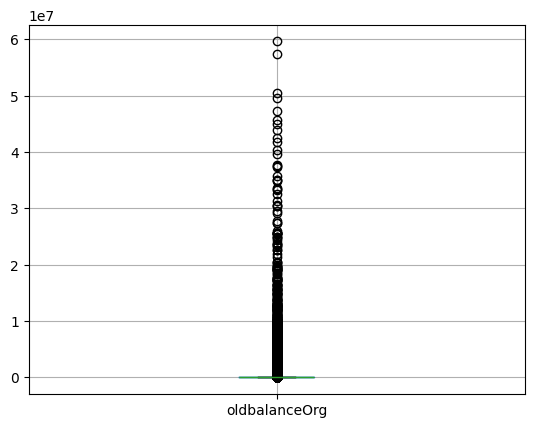

newbalanceOrig


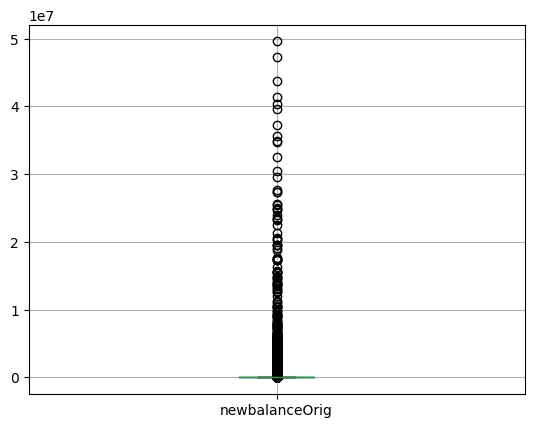

oldbalanceDest


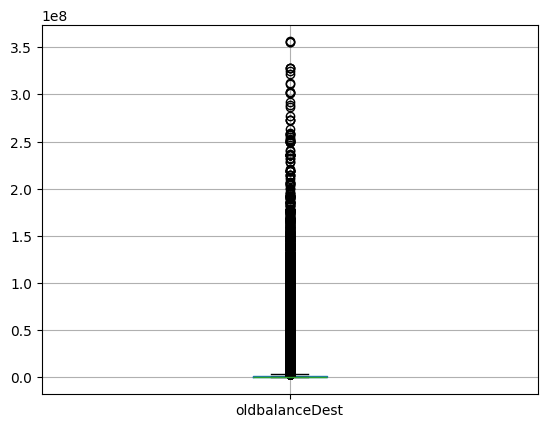

newbalanceDest


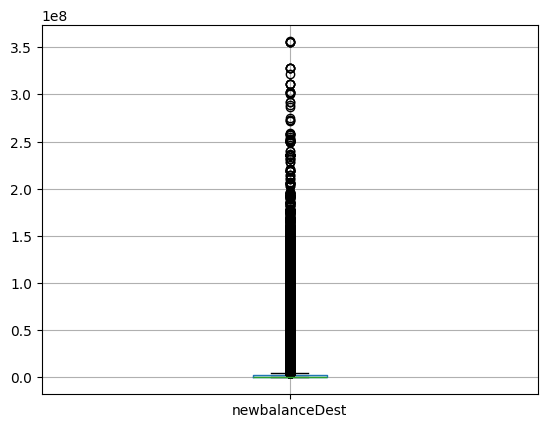

isFraud


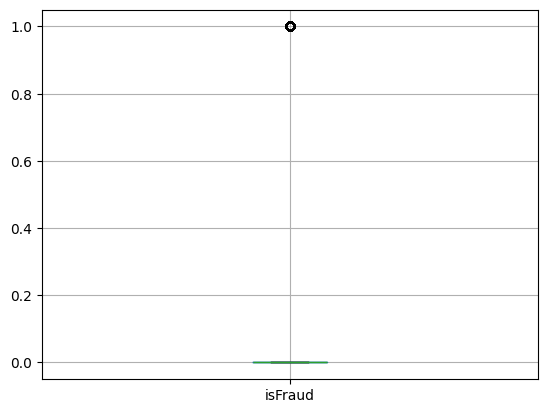

In [21]:

for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        
        
         print(i)
         df.boxplot(column = i)
         plt.show()
    else:
        pass


 There are a lot of outliers in but we cannot remove those data because many outliers are associated with fraudulent transactions.


### Checking MultiColinearity

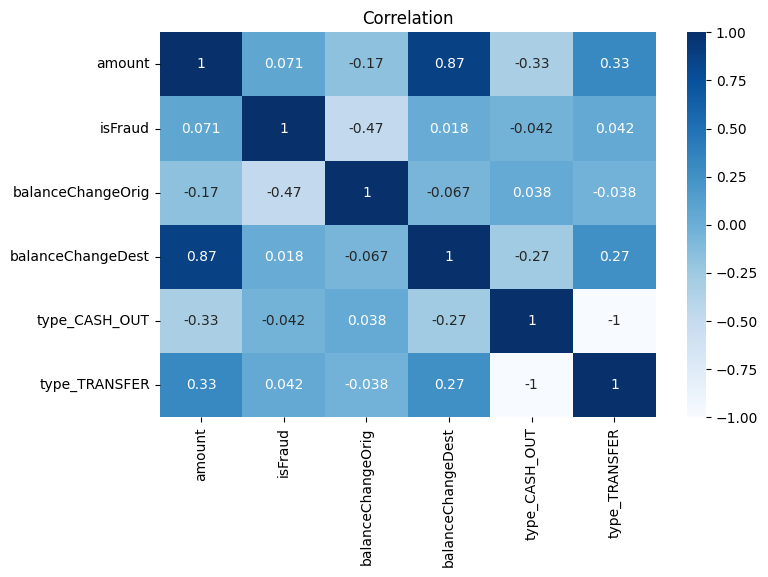

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only= True), cmap='Blues',annot=True)
plt.title('Correlation')
plt.show()

 There  is  high  correlation  between  oldbalanceDest  and  newbalanceDest  and  between  oldbalanceOrg  and  newbalanceOrig. 
 So  we  can  create  another  features  i)balanceChangeOrig  using  oldbalanceDest  and  newbalanceDest.
 ii) balanceChangeDest    using  oldbalanceOrg  and  newbalanceOrig.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif= pd.DataFrame()
vif["feature"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

  

In [ ]:
print(vif)

In [ ]:
# Create new columns for balance changes
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop the original balance columns
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

In [ ]:
df

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only= True), cmap='Blues',annot=True)
plt.title('Correlation')
plt.show()

### Handling Imbalanced of dataset

In [ ]:
df["isFraud"].value_counts()

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#df['nameOrig'] = labelencoder.fit_transform(df['nameOrig'])
#df['nameDest'] = labelencoder.fit_transform(df['nameDest'])
df['type_CASH_OUT'] = labelencoder.fit_transform(df['type_CASH_OUT'])
df['type_TRANSFER'] = labelencoder.fit_transform(df['type_TRANSFER'])

In [50]:
df

,amount,nameOrig,nameDest,isFraud,balanceChangeOrig,balanceChangeDest,type_CASH_OUT,type_TRANSFER
0,181.00,C1305486145,C553264065,1,-181.00,0.00,0,1
1,181.00,C840083671,C38997010,1,-181.00,-21182.00,1,0
2,229133.94,C905080434,C476402209,0,-15325.00,46430.44,1,0
3,215310.30,C1670993182,C1100439041,0,-705.00,-22425.00,0,1
4,311685.89,C1984094095,C932583850,0,-10835.00,2712905.89,0,1
...,...,...,...,...,...,...,...,...
2770404,339682.13,C786484425,C776919290,1,-339682.13,339682.13,1,0
2770405,6311409.28,C1529008245,C1881841831,1,-6311409.28,0.00,0,1
2770406,6311409.28,C1162922333,C1365125890,1,-6311409.28,6311409.27,1,0
2770407,850002.52,C1685995037,C2080388513,1,-850002.52,0.00,0,1


In [51]:
df

,amount,nameOrig,nameDest,isFraud,balanceChangeOrig,balanceChangeDest,type_CASH_OUT,type_TRANSFER
0,181.00,C1305486145,C553264065,1,-181.00,0.00,0,1
1,181.00,C840083671,C38997010,1,-181.00,-21182.00,1,0
2,229133.94,C905080434,C476402209,0,-15325.00,46430.44,1,0
3,215310.30,C1670993182,C1100439041,0,-705.00,-22425.00,0,1
4,311685.89,C1984094095,C932583850,0,-10835.00,2712905.89,0,1
...,...,...,...,...,...,...,...,...
2770404,339682.13,C786484425,C776919290,1,-339682.13,339682.13,1,0
2770405,6311409.28,C1529008245,C1881841831,1,-6311409.28,0.00,0,1
2770406,6311409.28,C1162922333,C1365125890,1,-6311409.28,6311409.27,1,0
2770407,850002.52,C1685995037,C2080388513,1,-850002.52,0.00,0,1


#### Splitting the dataset

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
# underSampling

normal = df[df["isFraud"]==0]
fraud = df[df["isFraud"]==1]

In [55]:
normal.shape
fraud.shape

(8213, 8)

In [56]:
normal_sample = normal.sample(n=8213)
normal_sample.shape

(8213, 8)

In [57]:
new_df = pd.concat([normal_sample,fraud],ignore_index=True)

In [58]:
new_df["isFraud"].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [59]:
X =new_df.drop(columns = ['isFraud','nameOrig','nameDest'],axis=1)
y = new_df['isFraud']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
X_train

,amount,balanceChangeOrig,balanceChangeDest,type_CASH_OUT,type_TRANSFER
6022,452596.60,-4164.00,452596.60,1,0
10283,342675.47,-342675.47,342675.47,1,0
8073,161328.97,0.00,161328.97,1,0
9002,2096634.43,-2096634.43,2096634.43,1,0
8498,1698263.69,-1698263.69,0.00,0,1
...,...,...,...,...,...
14696,10000000.00,-10000000.00,0.00,0,1
1099,137955.88,0.00,137955.88,1,0
11798,688473.32,-688473.32,0.00,0,1
6637,16585.88,0.00,16585.89,1,0


#### StandardScaler

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()

In [66]:
model1 = lr.fit(X_train_scaled,y_train)
model1

LogisticRegression()

In [67]:
y_pred = model1.predict(X_test_scaled)

In [68]:
from sklearn.metrics import accuracy_score

#### Accuracy Score

In [69]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9017041996348144

In [70]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [71]:
print(precision_score(y_test,y_pred))

0.9457831325301205


In [72]:
print(recall_score(y_test,y_pred))

0.8537764350453172


In [73]:
print(f1_score(y_test,y_pred))

0.8974277548428072


In [74]:
y_thre = np.where(y_pred > .5,1,0)

### Decision Tree 

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()

In [77]:
model2 = dt.fit(X_train_scaled,y_train)

In [78]:
y_pred = model2.predict(X_test_scaled)

#### Accuracy Score

In [79]:
accuracy_score(y_test,y_pred)

0.9236153377967133

In [80]:
print(precision_score(y_test,y_pred))

0.9223826714801444


In [81]:
print(recall_score(y_test,y_pred))

0.9262839879154079


In [82]:
print(f1_score(y_test,y_pred))

0.9243292131444076


### Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier()

In [85]:
model3 = rf.fit(X_train_scaled,y_train)

In [86]:
y_pred3 = model3.predict(X_test_scaled)

In [87]:
accuracy_score(y_test,y_pred3)

0.9324406573341448

In [88]:
print(precision_score(y_test,y_pred3))

0.9355623100303951


In [89]:
print(recall_score(y_test,y_pred3))

0.9299093655589123


In [90]:
print(f1_score(y_test,y_pred3))

0.9327272727272727


Our fraud detection model is designed to identify potentially fraudulent transactions within a financial company's system. The model utilizes a machine learning algorithm called Random Forest Classifier to predict whether a given transaction is likely to be fraudulent or not.

In [91]:
def predict(config, model3):
    
    if type(config) == dict:
        new_df = pd.DataFrame(config)
    else:
        new_df = config
    
    y_pred = model3.predict(new_df)
    y_thre = np.where(y_pred > .5,1,0)
    
    
    if y_thre == 1:
        return 'Fraud'
    elif y_thre == 0:
        return 'Legitimate'

In [92]:
config = {
    'amount': [229133.94],
    #'nameOrig': [436008],
    #'nameDest': [391672],
    'balanceChangeOrig':[-15325.00],
    'balanceChangeDest':[46430.44],
    'type_TRANSFER':[0],
    'type_CASH_OUT':[1]
}

predict(config, model3)

C:\Users\panmo\anaconda3\envs\campusx\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


'Fraud'

In [94]:
import pickle

# Save to file in the current working directory
pkl_filename = "Fraud_Detection.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model3, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = accuracy_score(y_test,y_pred3)
print("Test score: {0:.2f} %".format(100 * score))
y_thre = pickle_model.predict(X_test)
y_pred = np.where(y_thre > .5,1,0)

Test score: 93.24 %


C:\Users\panmo\anaconda3\envs\campusx\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [96]:
##loading the model from the saved file
pkl_filename = "Fraud_Detection.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictValue = predict(config, model)
predictValue

C:\Users\panmo\anaconda3\envs\campusx\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


'Fraud'